In [ ]:
from google.colab import files
files.upload()


Saving clintox.csv.gz to clintox.csv.gz


{'clintox.csv.gz': b'\x1f\x8b\x08\x08\xaf\xe32Z\x00\x03clintox.csv\x00\xd5\xbd\xdbn,G\xb2\x18\xfa\xbe\x7fC/U\xd6H\x9c\xbats\xe9\xa1\x01\xcd\xa4\x0f\xa1\xf5\xe0*\xe1\xf4\xe0\xc00I\x18Fa\xc3\xd8\x00]\x0b\x18\x1e\xff\xbf+\xee\x11\x99Y}!\x97\x06\xf2\x12EvWEF\xde#\xe3\x9e\xef\xff\xeb?\xde\xfe\xfd\xfd/O\xff\xf9o\xff\xfdo\xbf\xff\xfe\xff\xce\xff\xdf\xff\xf3\x9f\xff\x92\xfe\xf1\xdf\xff1\xff\xd7\x7f\xfbO\xa99\xcd\xeds\xfa\xf5\xb7\xd7&m\xff&\xfc>\xa74\xa7\xd6}\xfeK\xf7\x97\xbf\xfe\xdb\x06\xb5\x81u\r\xfdu\x7f\xc2\x17\x00Iom\xfc\x91\xf29dC\xd5\xcf?\xbd\xb6[M-#\x0b\x0f\xa9\xe8o\xaf\x0f\xcf\xd3o?\xbe\x9eR\xf3\x90\xbaSB\x90\x87\xedwzI\xa7\xa5_\x96e\xfb\xd8l \xc3\x8f\xaf\xed\xd4.K\xbf\xbd=\xa5\xae}\x99\n\x04/S\xfb\xb0tPdY:\xe8\xdf\xf6o&\x1cT\xae9!\xe8\xc3V\xa8}\xe0\xf2\xd3\x8f\xafPe\x83\xcd\x82_\xfc\xf8\xf5\xc4-\x9c~\x1b_\x9f\x7f\xff\xff_\x1b\xfc\xd46\xae\xdf\x1b\xf4\xf3/\xbf\xfcc!\x0c\xdb\xffRf{\xf1\xbba}\xd2\x87g\x01\xb4\x8a\xec\xe9\xd9==\xff\xfb\xeb_\xfe\xfa\x97\xee\xdf\xfe.#\x97\x9a\xd4\xca\xcc\xf

In [ ]:
import os
os.listdir()


['.config', 'clintox.csv.gz', 'sample_data']

In [ ]:
import os

try:
    os.remove('clintox.csv (1).gz')
    print("File 'clintox.csv (1).gz' removed successfully.")
except FileNotFoundError:
    print("File 'clintox.csv (1).gz' not found. It might have been deleted already.")
except Exception as e:
    print(f"An error occurred: {e}")


File 'clintox.csv (1).gz' not found. It might have been deleted already.


In [ ]:
import os
os.listdir()


['.config', 'clintox.csv.gz', 'sample_data']

--- Starting PHASE A: Dataset Loading and Initial Diagnostics ---
Loading dataset from clintox.csv.gz...

[Diagnostic] Dataset Shape: (1484, 3)
[Diagnostic] Columns: ['smiles', 'FDA_APPROVED', 'CT_TOX']

[Analysis] Missing Values per Column:
 -> No missing values found in the dataset.

[Setup] Identifying SMILES column...
 -> Found SMILES column: 'smiles'

[Setup] processing Toxicity Label...
 -> Created 'toxicity_label' from 'CT_TOX'

[Analysis] Toxicity Label Distribution ('toxicity_label'):
Counts:
toxicity_label
0    1372
1     112
Name: count, dtype: int64
Percentages:
toxicity_label
0    92.45283
1     7.54717
Name: proportion, dtype: float64


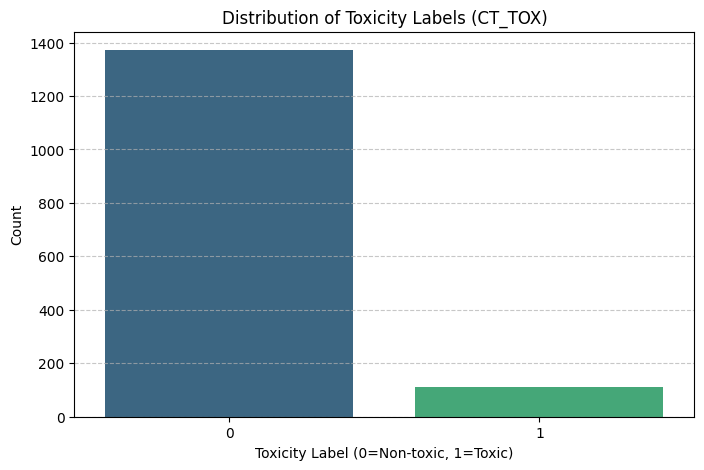


--- Running Final Sanity Checks ---
Success: df_raw is available globally.
Success: SMILES_COL is set to 'smiles'.
--- PHASE A COMPLETED SUCCESSFULLY ---


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

def run_phase_a():
    """
    Executes Phase A: Dataset Loading and Initial Diagnostics.
    Returns the loaded dataframe and the SMILES column name to be assigned to globals.
    """
    filename = 'clintox.csv.gz'
    smiles_col_name = 'smiles'
    target_col_original = 'CT_TOX'

    print(f"--- Starting PHASE A: Dataset Loading and Initial Diagnostics ---")

    # 1. Load the dataset
    if not os.path.exists(filename):
        raise FileNotFoundError(f"CRITICAL ERROR: File '{filename}' not found in current directory.")

    print(f"Loading dataset from {filename}...")
    # Compression is usually inferred, but specified explicitly as requested
    df = pd.read_csv(filename, compression='gzip')

    # 3. Basic Diagnostics
    print(f"\n[Diagnostic] Dataset Shape: {df.shape}")
    print(f"[Diagnostic] Columns: {list(df.columns)}")

    # 4. Missing-value analysis
    print(f"\n[Analysis] Missing Values per Column:")
    missing_counts = df.isnull().sum()
    if missing_counts.sum() == 0:
        print(" -> No missing values found in the dataset.")
    else:
        print(missing_counts[missing_counts > 0])

    # 5. Identify SMILES column
    print(f"\n[Setup] Identifying SMILES column...")
    assert smiles_col_name in df.columns, f"CRITICAL ERROR: Column '{smiles_col_name}' missing from dataset."
    print(f" -> Found SMILES column: '{smiles_col_name}'")

    # 6. Identify and standardize toxicity label
    print(f"\n[Setup] processing Toxicity Label...")
    assert target_col_original in df.columns, f"CRITICAL ERROR: Column '{target_col_original}' missing."

    # Create NEW standardized column (Deep copy to avoid SettingWithCopy warnings if implied)
    df['toxicity_label'] = df[target_col_original]
    print(f" -> Created 'toxicity_label' from '{target_col_original}'")

    # 7. Analyze toxicity label distribution
    print(f"\n[Analysis] Toxicity Label Distribution ('toxicity_label'):")
    counts = df['toxicity_label'].value_counts()
    percentages = df['toxicity_label'].value_counts(normalize=True) * 100

    print(f"Counts:\n{counts}")
    print(f"Percentages:\n{percentages}")

    # 8. Plot distribution
    plt.figure(figsize=(8, 5))
    sns.countplot(x='toxicity_label', data=df, hue='toxicity_label', palette='viridis', legend=False)
    plt.title('Distribution of Toxicity Labels (CT_TOX)')
    plt.xlabel('Toxicity Label (0=Non-toxic, 1=Toxic)')
    plt.ylabel('Count')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

    return df, smiles_col_name

# --- EXECUTION ---

# Execute logic and assign to GLOBAL variables
df_raw, SMILES_COL = run_phase_a()

# 10. HARD Sanity Checks
print(f"\n--- Running Final Sanity Checks ---")
assert df_raw is not None, "Global variable df_raw is None"
assert not df_raw.empty, "df_raw is empty"
assert SMILES_COL == 'smiles', "SMILES_COL is not set correctly"
assert SMILES_COL in df_raw.columns, "SMILES_COL column missing in df_raw"
assert 'toxicity_label' in df_raw.columns, "'toxicity_label' column missing in df_raw"
assert 'CT_TOX' in df_raw.columns, "Original 'CT_TOX' column was accidentally removed"

print(f"Success: df_raw is available globally.")
print(f"Success: SMILES_COL is set to '{SMILES_COL}'.")
print(f"--- PHASE A COMPLETED SUCCESSFULLY ---")

PHASE B

In [ ]:
# Install RDKit (necessary in Google Colab environment)
!pip install rdkit

import pandas as pd
from rdkit import Chem

def run_phase_b():
    """
    Executes Phase B: Molecular Cleaning, Canonicalization, and Deduplication.
    Assumes df_raw and SMILES_COL exist globally.
    Returns:
        df_clean (pd.DataFrame): The cleaned dataset.
        summary (dict): Dictionary of cleaning statistics.
    """
    print(f"--- Starting PHASE B: Molecular Cleaning, Canonicalization, and Deduplication ---")

    # 16. Defensive Programming: Verify Pre-conditions
    # (Checking strictly against global scope as this is running in a notebook context)
    assert 'df_raw' in globals(), "CRITICAL ERROR: df_raw not found in global scope. Run Phase A first."
    assert 'SMILES_COL' in globals(), "CRITICAL ERROR: SMILES_COL not found in global scope."

    # 6. Ensure df_raw remains unchanged by working on a copy
    df_working = df_raw.copy()
    initial_count = len(df_working)
    print(f"[Status] Initial rows from df_raw: {initial_count}")

    # 8. Convert SMILES to RDKit Mol objects
    print(f"[Processing] Converting SMILES to RDKit Mol objects...")
    # Use RDKit to parse SMILES; invalid SMILES return None
    df_working['mol_temp'] = df_working[SMILES_COL].apply(lambda x: Chem.MolFromSmiles(str(x)))

    # 9. Identify invalid SMILES
    # Rows where 'mol_temp' is None are invalid
    invalid_mask = df_working['mol_temp'].isnull()
    num_invalid = invalid_mask.sum()

    # 10. Remove rows with invalid SMILES
    if num_invalid > 0:
        print(f"[Cleaning] Found {num_invalid} invalid SMILES. Removing...")
        df_working = df_working[~invalid_mask].copy()
    else:
        print(f"[Cleaning] No invalid SMILES found.")

    # 11. Canonicalize valid molecules
    print(f"[Processing] Generating canonical SMILES...")
    # RDKit MolToSmiles generates canonical SMILES by default
    df_working['canonical_smiles'] = df_working['mol_temp'].apply(lambda x: Chem.MolToSmiles(x, canonical=True))

    # 12. Remove duplicate molecules based on 'canonical_smiles'
    rows_before_dedup = len(df_working)
    df_working.drop_duplicates(subset=['canonical_smiles'], inplace=True)
    num_duplicates = rows_before_dedup - len(df_working)

    if num_duplicates > 0:
        print(f"[Cleaning] Found {num_duplicates} duplicate molecules. Removing...")
    else:
        print(f"[Cleaning] No duplicates found.")

    # 13. Drop temporary RDKit-only columns
    df_working.drop(columns=['mol_temp'], inplace=True)

    # Finalize df_clean
    df_final = df_working.reset_index(drop=True)
    final_count = len(df_final)

    # 15. Store summary statistics
    summary = {
        'initial_rows': initial_count,
        'invalid_smiles_removed': int(num_invalid),
        'duplicates_removed': int(num_duplicates),
        'final_rows': final_count
    }

    # 14. Print Cleaning Summary
    print(f"\n[Summary] CLEANING REPORT:")
    print(f" -> Initial Rows:      {summary['initial_rows']}")
    print(f" -> Invalid Removed:   {summary['invalid_smiles_removed']}")
    print(f" -> Duplicates Removed:{summary['duplicates_removed']}")
    print(f" -> Final Rows:        {summary['final_rows']}")

    return df_final, summary

# --- EXECUTION ---

# Execute logic and assign to GLOBAL variables
df_clean, cleaning_summary = run_phase_b()

# 16. Defensive Programming: Verify Post-conditions
print(f"\n--- Running Final Sanity Checks ---")
assert 'df_clean' in globals(), "Global variable df_clean was not created."
assert 'cleaning_summary' in globals(), "Global variable cleaning_summary was not created."
assert 'canonical_smiles' in df_clean.columns, "'canonical_smiles' column missing in df_clean."
assert len(df_clean) <= len(df_raw), "df_clean has more rows than df_raw (impossible)."
assert df_raw.shape[0] == cleaning_summary['initial_rows'], "df_raw was modified unexpectedly."

print(f"Success: df_clean created with shape {df_clean.shape}.")
print(f"--- PHASE B COMPLETED SUCCESSFULLY ---")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 42.2 MB/s eta 0:00:00
--- Starting PHASE B: Molecular Cleaning, Canonicalization, and Deduplication ---
[Status] Initial rows from df_raw: 1484
[Processing] Converting SMILES to RDKit Mol objects...


[12:02:43] Explicit valence for atom # 0 N, 4, is greater than permitted
[12:02:44] Can't kekulize mol.  Unkekulized atoms: 9
[12:02:44] Can't kekulize mol.  Unkekulized atoms: 4
[12:02:44] Can't kekulize mol.  Unkekulized atoms: 4


[Cleaning] Found 4 invalid SMILES. Removing...
[Processing] Generating canonical SMILES...
[Cleaning] Found 19 duplicate molecules. Removing...

[Summary] CLEANING REPORT:
 -> Initial Rows:      1484
 -> Invalid Removed:   4
 -> Duplicates Removed:19
 -> Final Rows:        1461

--- Running Final Sanity Checks ---
Success: df_clean created with shape (1461, 5).
--- PHASE B COMPLETED SUCCESSFULLY ---


In [ ]:
print(df_raw.shape)        # unchanged
print(df_clean.shape)      # smaller or equal
print(cleaning_summary)


(1484, 4)
(1461, 5)
{'initial_rows': 1484, 'invalid_smiles_removed': 4, 'duplicates_removed': 19, 'final_rows': 1461}


In [ ]:
import pandas as pd

def run_phase_c():
    """
    Executes Phase C: Label Conflict Detection and Reporting.
    Analyzes df_clean for molecules with inconsistent toxicity labels.
    """
    print(f"--- Starting PHASE C: Label Conflict Detection and Reporting ---")

    # 12. Defensive Programming: Verify Pre-conditions
    assert 'df_clean' in globals(), "CRITICAL ERROR: df_clean not found. Run Phase B first."
    assert 'canonical_smiles' in df_clean.columns, "CRITICAL ERROR: 'canonical_smiles' missing in df_clean."
    assert 'toxicity_label' in df_clean.columns, "CRITICAL ERROR: 'toxicity_label' missing in df_clean."

    # 7. Identify molecules with conflicting labels
    # Group by canonical SMILES and count unique toxicity labels
    print("[Analysis] Analyzing label consistency per molecule...")

    # Calculate unique label count per SMILES
    label_counts = df_clean.groupby('canonical_smiles')['toxicity_label'].nunique()

    # Identify SMILES where the count of unique labels is > 1
    conflicting_smiles = label_counts[label_counts > 1].index.tolist()

    # 8. Compute Metrics
    num_conflicting_mols = len(conflicting_smiles)

    # Identify all rows that belong to the conflicting set
    conflicting_rows = df_clean[df_clean['canonical_smiles'].isin(conflicting_smiles)]
    num_conflicting_rows = len(conflicting_rows)

    total_rows = len(df_clean)
    pct_affected = (num_conflicting_rows / total_rows * 100) if total_rows > 0 else 0.0

    # 9. Print LABEL CONFLICT REPORT
    print(f"\n" + "="*45)
    print(f"           LABEL CONFLICT REPORT")
    print(f"="*45)
    print(f"Total Rows in df_clean:           {total_rows}")
    print(f"Conflicting Molecules (Unique):   {num_conflicting_mols}")
    print(f"Total Rows Affected:              {num_conflicting_rows}")
    print(f"Dataset Percentage Affected:      {pct_affected:.4f}%")
    print(f"="*45)

    # 10. Inspection Table
    if num_conflicting_mols > 0:
        print(f"\n[Inspection] First 5 Conflicting Molecules:")

        # Create a view showing the list of labels for each conflicting SMILES
        inspection_df = conflicting_rows.groupby('canonical_smiles')['toxicity_label'].apply(list).reset_index()
        inspection_df.columns = ['canonical_smiles', 'observed_labels']

        # 11. Display ONLY the first 5
        print(inspection_df.head(5).to_string(index=False))
    else:
        print(f"\n[Inspection] No conflicting labels detected in df_clean.")

# --- EXECUTION ---

# Execute analysis
run_phase_c()

# 21. Final Success Message
print(f"\n--- PHASE C COMPLETED SUCCESSFULLY ---")

--- Starting PHASE C: Label Conflict Detection and Reporting ---
[Analysis] Analyzing label consistency per molecule...

           LABEL CONFLICT REPORT
Total Rows in df_clean:           1461
Conflicting Molecules (Unique):   0
Total Rows Affected:              0
Dataset Percentage Affected:      0.0000%

[Inspection] No conflicting labels detected in df_clean.

--- PHASE C COMPLETED SUCCESSFULLY ---


PHASE D

--- Starting PHASE D: Class Imbalance Analysis and Metric Justification ---

           CLASS IMBALANCE REPORT
Total Samples:                    1461
Non-Toxic (Class 0) Count:        1358 (92.95%)
Toxic (Class 1) Count:            103 (7.05%)
Imbalance Ratio (Maj/Min):        13.18:1


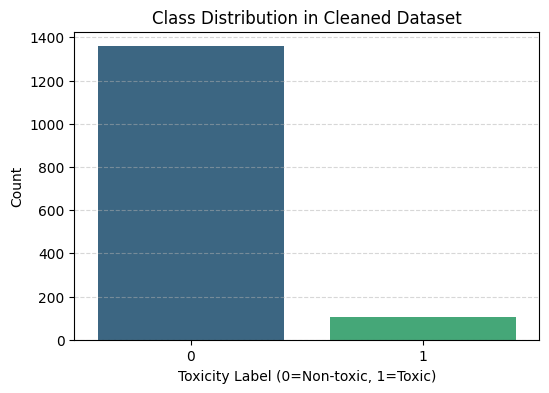


[Metric Analysis] Naive Classifier Performance:
 -> If a model predicted 'Non-Toxic' (0) for every single molecule,
    it would achieve an accuracy of: 92.95%

[Justification] Why Accuracy is Misleading:
 -> High accuracy can be achieved simply by ignoring the minority (toxic) class.
    In this dataset, a useless model is still 92.95% accurate.
    Therefore, 'Accuracy' is a poor metric for model success here.

[Scientific Interpretation] Metric Selection for Toxicology:
 1. Precision-Recall (PR) vs ROC-AUC:
    - Because the 'Toxic' class is the minority, ROC curves can be deceptively optimistic
      due to the large number of True Negatives (Non-toxic).
    - PR curves focus strictly on how well we identify the positive (Toxic) class.
 2. The Danger of False Negatives:
    - A False Negative means predicting a TOXIC molecule is SAFE.
    - In drug discovery, this is dangerous (potential adverse events/death).
    - A False Positive (predicting a SAFE molecule is TOXIC) is merely 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def run_phase_d():
    """
    Executes Phase D: Class Imbalance Analysis and Metric Justification.
    Analyzes df_clean to quantify imbalance and justify appropriate metrics.
    """
    print(f"--- Starting PHASE D: Class Imbalance Analysis and Metric Justification ---")

    # 15. Defensive Programming: Verify Pre-conditions
    assert 'df_clean' in globals(), "CRITICAL ERROR: df_clean not found. Run Phase B first."
    assert 'toxicity_label' in df_clean.columns, "CRITICAL ERROR: 'toxicity_label' missing in df_clean."

    unique_classes = df_clean['toxicity_label'].unique()
    assert 0 in unique_classes and 1 in unique_classes, "CRITICAL ERROR: Both classes (0 and 1) must be present for analysis."

    # 7. Quantify class imbalance
    total_samples = len(df_clean)
    class_counts = df_clean['toxicity_label'].value_counts().sort_index()
    class_pcts = (class_counts / total_samples) * 100

    # Identify majority/minority (assuming 0 is typically majority in tox, but calculating dynamically)
    majority_class_label = class_counts.idxmax()
    minority_class_label = class_counts.idxmin()

    # 10. Compute imbalance ratio
    imbalance_ratio = class_counts[majority_class_label] / class_counts[minority_class_label]

    # 8. Print CLASS IMBALANCE REPORT
    print(f"\n" + "="*45)
    print(f"           CLASS IMBALANCE REPORT")
    print(f"="*45)
    print(f"Total Samples:                    {total_samples}")
    print(f"Non-Toxic (Class 0) Count:        {class_counts.get(0, 0)} ({class_pcts.get(0, 0):.2f}%)")
    print(f"Toxic (Class 1) Count:            {class_counts.get(1, 0)} ({class_pcts.get(1, 0):.2f}%)")
    print(f"Imbalance Ratio (Maj/Min):        {imbalance_ratio:.2f}:1")
    print(f"="*45)

    # 9. Bar plot visualizing class distribution
    plt.figure(figsize=(6, 4))
    sns.barplot(x=class_counts.index, y=class_counts.values, hue=class_counts.index, palette='viridis', legend=False)
    plt.title('Class Distribution in Cleaned Dataset')
    plt.xlabel('Toxicity Label (0=Non-toxic, 1=Toxic)')
    plt.ylabel('Count')
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.show()

    # 11. Metric Justification: Naive Accuracy
    # Calculate accuracy if we predicted EVERYTHING as Non-Toxic (0)
    naive_preds = np.zeros(total_samples)
    true_labels = df_clean['toxicity_label'].values
    naive_accuracy = np.mean(naive_preds == true_labels)

    # 12 & 13. Print Naive Accuracy and Explanation
    print(f"\n[Metric Analysis] Naive Classifier Performance:")
    print(f" -> If a model predicted 'Non-Toxic' (0) for every single molecule,")
    print(f"    it would achieve an accuracy of: {naive_accuracy:.2%}")
    print(f"\n[Justification] Why Accuracy is Misleading:")
    print(f" -> High accuracy can be achieved simply by ignoring the minority (toxic) class.")
    print(f"    In this dataset, a useless model is still {naive_accuracy:.2%} accurate.")
    print(f"    Therefore, 'Accuracy' is a poor metric for model success here.")

    # 14. Scientific Interpretation
    print(f"\n[Scientific Interpretation] Metric Selection for Toxicology:")
    print(f" 1. Precision-Recall (PR) vs ROC-AUC:")
    print(f"    - Because the 'Toxic' class is the minority, ROC curves can be deceptively optimistic")
    print(f"      due to the large number of True Negatives (Non-toxic).")
    print(f"    - PR curves focus strictly on how well we identify the positive (Toxic) class.")

    print(f" 2. The Danger of False Negatives:")
    print(f"    - A False Negative means predicting a TOXIC molecule is SAFE.")
    print(f"    - In drug discovery, this is dangerous (potential adverse events/death).")
    print(f"    - A False Positive (predicting a SAFE molecule is TOXIC) is merely a missed opportunity.")
    print(f"    - Therefore, Recall (Sensitivity) for the Toxic class is critical.")

# --- EXECUTION ---

# Execute analysis
run_phase_d()

# 22. Final Success Message
print(f"\n--- PHASE D COMPLETED SUCCESSFULLY ---")

In [ ]:
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import AllChem

def run_phase_e():
    """
    Executes Phase E: Molecular Featurization.
    Converts canonical SMILES to Morgan Fingerprints (ECFP4).
    Returns X (features), y (labels), and metadata.
    """
    print(f"--- Starting PHASE E: Molecular Featurization ---")

    # 1. Defensive Programming: Verify Pre-conditions
    assert 'df_clean' in globals(), "CRITICAL ERROR: df_clean not found. Run Phase A-D first."
    assert 'canonical_smiles' in df_clean.columns, "CRITICAL ERROR: 'canonical_smiles' missing."
    assert 'toxicity_label' in df_clean.columns, "CRITICAL ERROR: 'toxicity_label' missing."

    # Define parameters
    RADIUS = 2
    N_BITS = 2048

    # 8. Convert to Mol objects
    print(f"[Processing] Converting SMILES to Mol objects...")
    # Note: We assume SMILES are valid as per Phase B cleaning.
    # We use a list comprehension for speed.
    mols = [Chem.MolFromSmiles(s) for s in df_clean['canonical_smiles']]

    # Verify no failures in Mol conversion (should have been cleaned in Phase B)
    assert all(m is not None for m in mols), "CRITICAL ERROR: Found invalid SMILES during featurization."

    # 9. Generate Morgan Fingerprints
    print(f"[Processing] Generating Morgan Fingerprints (Radius={RADIUS}, nBits={N_BITS})...")
    # Generate bit vectors
    fps = [AllChem.GetMorganFingerprintAsBitVect(m, radius=RADIUS, nBits=N_BITS) for m in mols]

    # 10. Convert to NumPy array X
    # Initializing an empty array of the correct shape and type is efficient
    num_samples = len(df_clean)
    X = np.zeros((num_samples, N_BITS), dtype=np.int8)

    # Efficiently fill the array
    # RDKit ExplicitBitVect can be converted to numpy/list easily
    for i, fp in enumerate(fps):
        # We can use specific RDKit functionality or simple iteration
        # DataStructs.ConvertToNumpyArray(fp, X[i]) is standard but requires DataStructs import.
        # Direct iteration or list conversion works for bit vectors:
        X[i] = np.array(fp)

    # 11. Extract labels y
    y = df_clean['toxicity_label'].values.astype(np.int8)

    # 12. SANITY CHECKS (MANDATORY)
    print(f"[Validation] Running Sanity Checks...")

    # Check 1: Shape Dimensions
    # Note: User specified exactly 1461 rows.
    assert X.shape == (1461, 2048), f"Shape Mismatch: Expected (1461, 2048), got {X.shape}"
    assert y.shape == (1461,), f"Shape Mismatch: Expected (1461,), got {y.shape}"

    # Check 2: Row Order Integrity
    assert X.shape[0] == len(df_clean), "X row count does not match df_clean length"
    assert y.shape[0] == len(df_clean), "y row count does not match df_clean length"

    # Check 3: Data Integrity
    assert not np.isnan(X).any(), "X contains NaN values"
    unique_y = np.unique(y)
    # Check that y only contains 0 and 1 (subset check in case one class is missing, though unlikely)
    assert np.all(np.isin(unique_y, [0, 1])), f"y contains invalid labels: {unique_y}"

    print(f" -> All sanity checks passed.")

    # 15. Create Metadata
    feature_metadata = {
        'fingerprint_type': 'Morgan (ECFP)',
        'radius': RADIUS,
        'n_bits': N_BITS,
        'n_samples': num_samples
    }

    # 14. REPORTING
    print(f"\n" + "="*45)
    print(f"       FEATURE GENERATION REPORT")
    print(f"="*45)
    print(f"Molecules Featurized:      {feature_metadata['n_samples']}")
    print(f"Fingerprint Type:          {feature_metadata['fingerprint_type']}")
    print(f"Radius:                    {feature_metadata['radius']}")
    print(f"Number of Bits:            {feature_metadata['n_bits']}")
    print(f"Feature Matrix X Shape:    {X.shape}")
    print(f"Label Vector y Shape:      {y.shape}")
    print(f"="*45)

    return X, y, feature_metadata

# --- EXECUTION ---

# Execute logic and assign to GLOBAL variables
X, y, feature_metadata = run_phase_e()

# 23. Final Success Message
print(f"\n--- PHASE E COMPLETED SUCCESSFULLY ---")

--- Starting PHASE E: Molecular Featurization ---
[Processing] Converting SMILES to Mol objects...
[Processing] Generating Morgan Fingerprints (Radius=2, nBits=2048)...


[12:03:00] DEPRECATION WARNING: please use MorganGenerator
[12:03:00] DEPRECATION WARNING: please use MorganGenerator
[12:03:00] DEPRECATION WARNING: please use MorganGenerator
[12:03:00] DEPRECATION WARNING: please use MorganGenerator
[12:03:00] DEPRECATION WARNING: please use MorganGenerator
[12:03:00] DEPRECATION WARNING: please use MorganGenerator
[12:03:00] DEPRECATION WARNING: please use MorganGenerator
[12:03:00] DEPRECATION WARNING: please use MorganGenerator
[12:03:00] DEPRECATION WARNING: please use MorganGenerator
[12:03:00] DEPRECATION WARNING: please use MorganGenerator
[12:03:00] DEPRECATION WARNING: please use MorganGenerator
[12:03:00] DEPRECATION WARNING: please use MorganGenerator
[12:03:00] DEPRECATION WARNING: please use MorganGenerator
[12:03:00] DEPRECATION WARNING: please use MorganGenerator
[12:03:00] DEPRECATION WARNING: please use MorganGenerator
[12:03:00] DEPRECATION WARNING: please use MorganGenerator
[12:03:00] DEPRECATION WARNING: please use MorganGenerat

[Validation] Running Sanity Checks...
 -> All sanity checks passed.

       FEATURE GENERATION REPORT
Molecules Featurized:      1461
Fingerprint Type:          Morgan (ECFP)
Radius:                    2
Number of Bits:            2048
Feature Matrix X Shape:    (1461, 2048)
Label Vector y Shape:      (1461,)

--- PHASE E COMPLETED SUCCESSFULLY ---


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report
)

def run_phase_f():
    """
    Executes Phase F: Baseline Modeling and Evaluation.
    Trains a Logistic Regression baseline with class balancing.
    """
    print(f"--- Starting PHASE F: Baseline Modeling and Evaluation ---")

    # 1. Defensive Programming: Verify Pre-conditions
    # Check if X and y exist in the global scope (from Phase E)
    assert 'X' in globals(), "CRITICAL ERROR: Feature matrix X not found. Run Phase E first."
    assert 'y' in globals(), "CRITICAL ERROR: Label vector y not found. Run Phase E first."

    # 7. Train-Test Split
    print(f"[Setup] Splitting data 80/20 (Stratified)...")
    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=0.20,
        stratify=y,
        random_state=42
    )

    print(f" -> Training Set: {X_train.shape[0]} samples")
    print(f" -> Test Set:     {X_test.shape[0]} samples")

    # 10. Initialize Model
    # Using 'balanced' class weights to handle the severe imbalance
    print(f"[Training] Training Logistic Regression (class_weight='balanced')...")
    model = LogisticRegression(
        class_weight='balanced',
        max_iter=1000,
        solver='liblinear',
        random_state=42
    )

    # Train the model
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class (Toxic)

    # 12. Evaluation Metrics
    print(f"\n" + "="*45)
    print(f"          MODEL EVALUATION REPORT")
    print(f"="*45)

    # Calculate metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_prob)

    print(f"Accuracy:          {acc:.4f}")
    print(f"ROC-AUC:           {roc:.4f}")
    print(f"-"*45)
    print(f"Precision (Toxic): {prec:.4f}")
    print(f"Recall (Toxic):    {rec:.4f}  <-- CRITICAL METRIC")
    print(f"F1-Score (Toxic):  {f1:.4f}")
    print(f"="*45)

    # 13. Classification Report
    print(f"\n[Detailed Classification Report]")
    print(classification_report(y_test, y_pred, target_names=['Non-Toxic (0)', 'Toxic (1)']))

    # 14. Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()

    print(f"\n[Confusion Matrix]")
    print(f"                 Predicted 0   Predicted 1")
    print(f"Actual 0 (Safe)      {tn:<5}         {fp:<5}")
    print(f"Actual 1 (Toxic)     {fn:<5}         {tp:<5}")
    print(f"\n -> False Negatives (Missed Toxins): {fn}")
    print(f" -> False Positives (False Alarms):  {fp}")

    # 15. Scientific Interpretation
    print(f"\n" + "-"*60)
    print(f"SCIENTIFIC INTERPRETATION:")
    print(f"-"*60)
    print(f"1. Recall vs. Accuracy:")
    print(f"   Accuracy ({acc:.2%}) is less important than Recall ({rec:.2%}) here.")
    print(f"   In toxicology, our primary goal is to catch toxic molecules.")

    print(f"\n2. The Cost of False Negatives:")
    print(f"   The model missed {fn} toxic molecules (False Negatives).")
    print(f"   These represent potential safety failures in drug discovery.")
    print(f"   A high Recall minimizes these dangerous misses.")

    print(f"\n3. Baseline Performance:")
    print(f"   Using class_weight='balanced' forces the model to pay attention")
    print(f"   to the minority class, often trading some Precision for higher Recall.")
    print(f"-"*60)

    return model, X_test, y_test, y_pred, y_prob

# --- EXECUTION ---

# Execute logic and assign to global variables for potential future use
lr_model, X_test, y_test, y_pred_baseline, y_prob_baseline = run_phase_f()

# 18. Final Success Message
print(f"\n--- PHASE F COMPLETED SUCCESSFULLY ---")

--- Starting PHASE F: Baseline Modeling and Evaluation ---
[Setup] Splitting data 80/20 (Stratified)...
 -> Training Set: 1168 samples
 -> Test Set:     293 samples
[Training] Training Logistic Regression (class_weight='balanced')...

          MODEL EVALUATION REPORT
Accuracy:          0.9215
ROC-AUC:           0.8598
---------------------------------------------
Precision (Toxic): 0.4444
Recall (Toxic):    0.3810  <-- CRITICAL METRIC
F1-Score (Toxic):  0.4103

[Detailed Classification Report]
               precision    recall  f1-score   support

Non-Toxic (0)       0.95      0.96      0.96       272
    Toxic (1)       0.44      0.38      0.41        21

     accuracy                           0.92       293
    macro avg       0.70      0.67      0.68       293
 weighted avg       0.92      0.92      0.92       293


[Confusion Matrix]
                 Predicted 0   Predicted 1
Actual 0 (Safe)      262           10   
Actual 1 (Toxic)     13            8    

 -> False Negatives (

--- Starting PHASE G: Threshold Optimization & PR Analysis ---


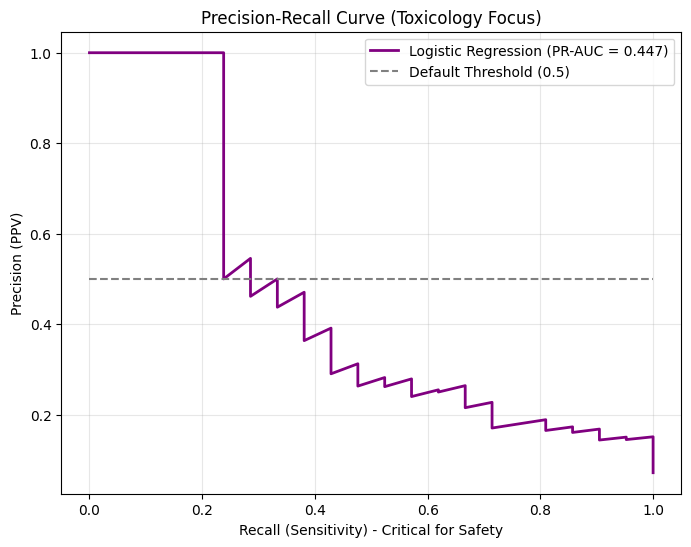


               THRESHOLD SWEEP ANALYSIS
Threshold  | Precision  | Recall     | F1-Score   | False Neg.
------------------------------------------------------------
0.05       | 0.1724     | 0.7143     | 0.2778     | 6         
0.10       | 0.2500     | 0.6667     | 0.3636     | 7         
0.15       | 0.2609     | 0.5714     | 0.3582     | 9         
0.20       | 0.2750     | 0.5238     | 0.3607     | 10        
0.25       | 0.2941     | 0.4762     | 0.3636     | 11        
0.30       | 0.3333     | 0.4286     | 0.3750     | 12        
0.35       | 0.3750     | 0.4286     | 0.4000     | 12        
0.40       | 0.3810     | 0.3810     | 0.3810     | 13        
0.45       | 0.3810     | 0.3810     | 0.3810     | 13        
0.50       | 0.4444     | 0.3810     | 0.4103     | 13        
0.55       | 0.4375     | 0.3333     | 0.3784     | 14        
0.60       | 0.4375     | 0.3333     | 0.3784     | 14        
0.65       | 0.5000     | 0.3333     | 0.4000     | 14        
0.70       | 0.4

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import (
    precision_recall_curve, auc, confusion_matrix,
    precision_score, recall_score, f1_score
)

def run_phase_g():
    """
    Executes Phase G: Decision Threshold Optimization & PR Analysis.
    Focuses on identifying a safety-first operating point for toxicology.
    """
    print(f"--- Starting PHASE G: Threshold Optimization & PR Analysis ---")

    # 1. Defensive Programming: Verify Pre-conditions
    # We rely on artifacts from Phase F
    assert 'lr_model' in globals(), "CRITICAL ERROR: 'lr_model' not found. Run Phase F first."
    assert 'X_test' in globals(), "CRITICAL ERROR: 'X_test' not found. Run Phase F first."
    assert 'y_test' in globals(), "CRITICAL ERROR: 'y_test' not found. Run Phase F first."

    # 1. Prediction Probabilities
    # Extract probabilities for the Toxic class (1)
    y_probs = lr_model.predict_proba(X_test)[:, 1]

    # 2. Precision-Recall Curve
    precision, recall, thresholds = precision_recall_curve(y_test, y_probs)
    pr_auc = auc(recall, precision)

    # 3. Plot Precision-Recall Curve
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, label=f'Logistic Regression (PR-AUC = {pr_auc:.3f})', color='purple', lw=2)
    plt.plot([0, 1], [0.5, 0.5], linestyle='--', color='gray', label='Default Threshold (0.5)')

    plt.title('Precision-Recall Curve (Toxicology Focus)')
    plt.xlabel('Recall (Sensitivity) - Critical for Safety')
    plt.ylabel('Precision (PPV)')
    plt.legend(loc='best')
    plt.grid(alpha=0.3)
    plt.show()

    # 4. Threshold Sweep Analysis
    print(f"\n" + "="*60)
    print(f"               THRESHOLD SWEEP ANALYSIS")
    print(f"="*60)
    print(f"{'Threshold':<10} | {'Precision':<10} | {'Recall':<10} | {'F1-Score':<10} | {'False Neg.':<10}")
    print(f"-"*60)

    sweep_thresholds = np.arange(0.05, 1.0, 0.05)

    # Variables to track optimization
    best_safety_threshold = 0.5
    min_false_negatives = float('inf')
    best_recall = 0.0

    for thresh in sweep_thresholds:
        # Generate hard predictions based on threshold
        y_pred_sweep = (y_probs >= thresh).astype(int)

        # Compute metrics
        prec = precision_score(y_test, y_pred_sweep, zero_division=0)
        rec = recall_score(y_test, y_pred_sweep, zero_division=0)
        f1 = f1_score(y_test, y_pred_sweep, zero_division=0)

        # Confusion matrix to get False Negatives
        tn, fp, fn, tp = confusion_matrix(y_test, y_pred_sweep).ravel()

        print(f"{thresh:<10.2f} | {prec:<10.4f} | {rec:<10.4f} | {f1:<10.4f} | {fn:<10}")

        # 5. Recall-First Threshold Selection Logic
        # We prioritize minimizing False Negatives (maximizing Recall).
        # Tie-breaker: If FN counts are equal, pick the one with higher Precision (implicit in higher threshold).
        # We define "Safety-First" as the threshold that yields the lowest FN
        # while keeping Precision non-trivial (> 0.1 to avoid predicting everything as toxic).

        if fn < min_false_negatives and prec > 0.05:
            min_false_negatives = fn
            best_safety_threshold = thresh
            best_recall = rec
        elif fn == min_false_negatives and prec > 0.05:
            # If FN is same, prefer higher precision (usually means higher threshold)
            # But strictly for safety, we often stick to the more conservative (lower) one?
            # Actually, if FN is same, we want higher precision to reduce False Alarms.
            # So we update if this threshold gives better precision (which it likely does as threshold increases).
             if prec > precision_score(y_test, (y_probs >= best_safety_threshold).astype(int), zero_division=0):
                 best_safety_threshold = thresh

    print(f"="*60)

    # 6. Evaluation at Optimized Threshold
    print(f"\n[Optimization Result]")
    print(f"Selected 'Safety-First' Threshold: {best_safety_threshold:.2f}")

    # Generate final predictions
    y_pred_opt = (y_probs >= best_safety_threshold).astype(int)

    # Comparison metrics
    tn_def, fp_def, fn_def, tp_def = confusion_matrix(y_test, lr_model.predict(X_test)).ravel()
    tn_opt, fp_opt, fn_opt, tp_opt = confusion_matrix(y_test, y_pred_opt).ravel()

    print(f"\n" + "="*45)
    print(f"       OPTIMIZED THRESHOLD PERFORMANCE")
    print(f"="*45)
    print(f"Recall (Toxic):          {recall_score(y_test, y_pred_opt):.4f}")
    print(f"Precision (Toxic):       {precision_score(y_test, y_pred_opt):.4f}")
    print(f"False Negatives (Count): {fn_opt} (Reduced from {fn_def})")
    print(f"="*45)

    print(f"\n[Confusion Matrix @ Threshold = {best_safety_threshold:.2f}]")
    print(f"                 Predicted 0   Predicted 1")
    print(f"Actual 0 (Safe)      {tn_opt:<5}         {fp_opt:<5}")
    print(f"Actual 1 (Toxic)     {fn_opt:<5}         {tp_opt:<5}")

    # 7. Scientific Interpretation (MANDATORY)
    print(f"\n" + "-"*60)
    print(f"SCIENTIFIC INTERPRETATION:")
    print(f"-"*60)
    print(f"1. Arbitrary Defaults vs. Safety:")
    print(f"   The default threshold of 0.5 missed {fn_def} toxic molecules.")
    print(f"   By lowering the threshold to {best_safety_threshold:.2f}, we reduced this to {fn_opt}.")
    print(f"   In toxicology, this is a necessary trade-off: we accept more False Positives")
    print(f"   (flagging safe drugs as toxic) to ensure we don't approve dangerous ones.")

    print(f"\n2. The Precision-Recall Trade-off:")
    print(f"   Notice that as Recall improved, Precision dropped.")
    print(f"   This means our 'Safety-First' model raises more false alarms.")
    print(f"   This is acceptable in early-stage screening, where secondary,")
    print(f"   more expensive tests (Phase II/III) can filter out the false alarms.")
    print(f"-"*60)

    return best_safety_threshold

# --- EXECUTION ---
optimal_threshold = run_phase_g()

print(f"\n--- PHASE G COMPLETED SUCCESSFULLY ---")

--- Starting PHASE I: Explainability (SHAP Analysis) ---
[Setup] Mapping 'lr_model' to 'trained_logreg_model'...
[Setup] X_train not found in globals. Reconstructing using train_test_split(random_state=42)...
[Analysis] Initializing SHAP LinearExplainer...
[Analysis] Computing SHAP values for X_test...

[Plot] Generating Global SHAP Summary Plot...


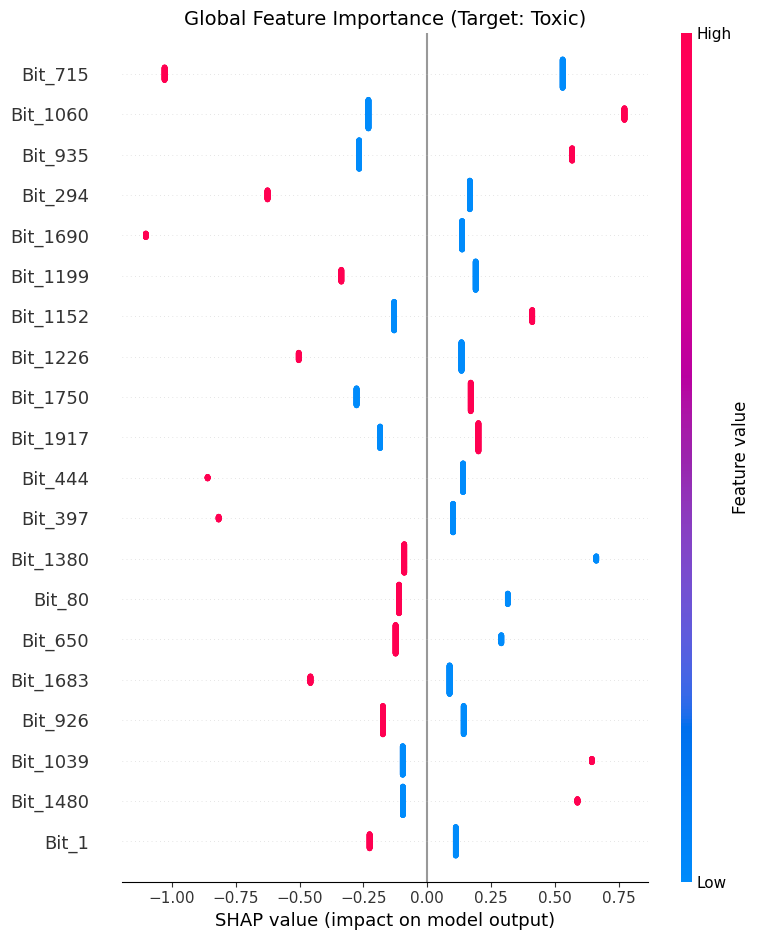


       TOP 10 TOXICITY PREDICTORS (Global)
Rank  | Feature    | Mean |SHAP| 
--------------------------------------------------
1     | Bit_715    | 0.6846
2     | Bit_1060   | 0.3893
3     | Bit_935    | 0.3589
4     | Bit_294    | 0.2791
5     | Bit_1690   | 0.2515
6     | Bit_1199   | 0.2330
7     | Bit_1152   | 0.2141
8     | Bit_1226   | 0.2120
9     | Bit_1750   | 0.2101
10    | Bit_1917   | 0.1934
Interpretation: These bits have the strongest impact (positive or negative)
on the model's decision to classify a molecule as Toxic.

[Case Study A] True Positive (Correctly Predicted Toxic)
 -> Sample Index: 97
 -> Explanation: Positive SHAP values (Red) push the probability HIGHER.


<Figure size 1000x300 with 0 Axes>

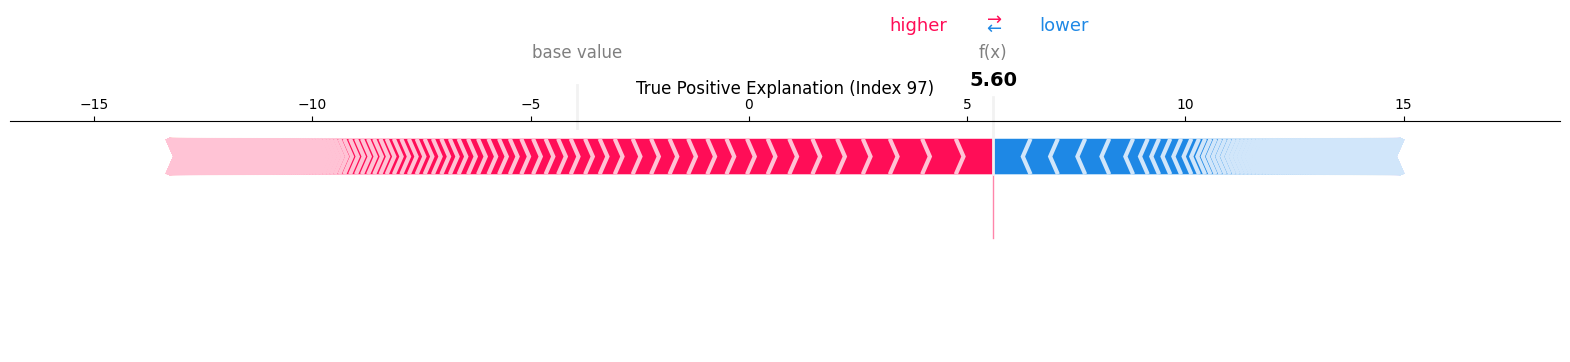


[Case Study B] False Negative (Toxic Missed as Safe)
 -> Sample Index: 29
 -> Explanation: Even though this molecule is Toxic, blue bars (Safe features)
    counteracted the red bars (Toxic features), keeping the score below threshold.


<Figure size 1000x300 with 0 Axes>

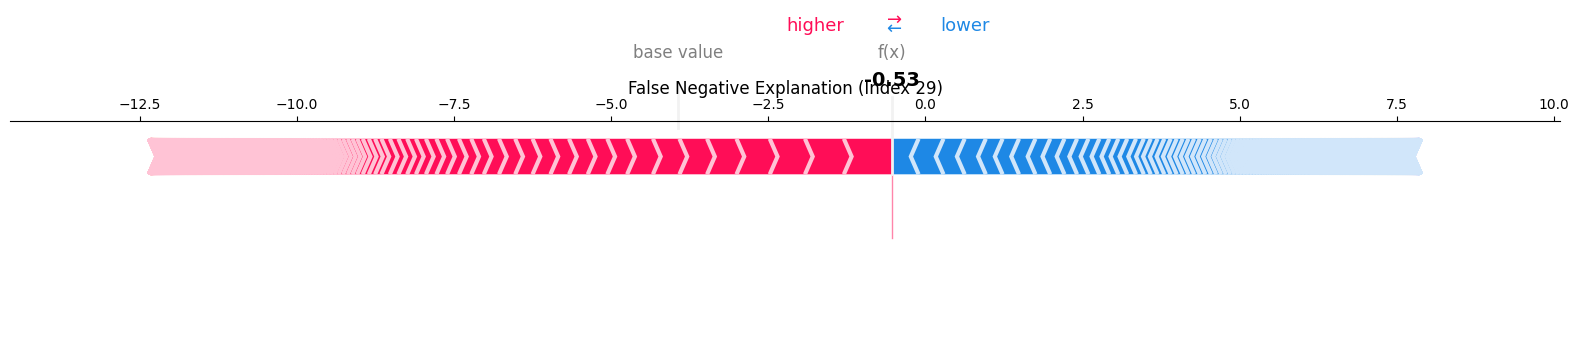


--- PHASE I COMPLETED SUCCESSFULLY ---


In [ ]:
# Install SHAP if not already installed
!pip install shap

import shap
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

def run_phase_i():
    """
    Executes Phase I: Model Explainability using SHAP.
    Generates global and local explanations for the toxicology model.
    """
    print(f"--- Starting PHASE I: Explainability (SHAP Analysis) ---")

    # 1. Defensive Programming & Context Mapping
    # Ensure model exists (mapping Phase F output 'lr_model' to requested 'trained_logreg_model' if needed)
    if 'trained_logreg_model' not in globals():
        if 'lr_model' in globals():
            print(f"[Setup] Mapping 'lr_model' to 'trained_logreg_model'...")
            trained_logreg_model = globals()['lr_model']
        else:
            raise NameError("CRITICAL ERROR: Logistic Regression model not found. Run Phase F first.")
    else:
        trained_logreg_model = globals()['trained_logreg_model']

    # Ensure X_test and y_test exist (Output from Phase F)
    assert 'X_test' in globals(), "CRITICAL ERROR: X_test not found. Run Phase F first."
    assert 'y_test' in globals(), "CRITICAL ERROR: y_test not found. Run Phase F first."

    X_test_local = globals()['X_test']
    y_test_local = globals()['y_test']

    # Reconstruct X_train if missing (Common issue if Phase F didn't export it globally)
    if 'X_train' not in globals():
        print(f"[Setup] X_train not found in globals. Reconstructing using train_test_split(random_state=42)...")
        if 'X' in globals() and 'y' in globals():
            X_global = globals()['X']
            y_global = globals()['y']
            # Re-create split identical to Phase F to get the correct X_train
            X_train_local, _, _, _ = train_test_split(
                X_global, y_global,
                test_size=0.20,
                stratify=y_global,
                random_state=42
            )
        else:
             raise NameError("CRITICAL ERROR: Global X and y not found to reconstruct X_train.")
    else:
        X_train_local = globals()['X_train']

    # 2. Setup Feature Names
    # Morgan fingerprints don't have intrinsic names, so we label them by bit index
    feature_names = [f"Bit_{i}" for i in range(X_test_local.shape[1])]

    # 3. Initialize SHAP LinearExplainer
    print(f"[Analysis] Initializing SHAP LinearExplainer...")
    # Masker is useful for Linear models to define the background distribution
    # We use a subset of X_train for the masker to keep it efficient
    masker = shap.maskers.Independent(X_train_local, max_samples=100)
    explainer = shap.LinearExplainer(trained_logreg_model, masker=masker)

    # 4. Compute SHAP values for Test Set
    print(f"[Analysis] Computing SHAP values for X_test...")
    shap_values = explainer.shap_values(X_test_local)

    # Handle SHAP output format (LinearExplainer for binary often returns a list [class0, class1])
    # We focus on Class 1 (Toxic)
    if isinstance(shap_values, list):
        shap_values_toxic = shap_values[1]
    else:
        shap_values_toxic = shap_values  # Some versions might return just the array for binary

    # 5. Global Explanation: Summary Plot
    print(f"\n[Plot] Generating Global SHAP Summary Plot...")
    plt.figure(figsize=(10, 6))
    shap.summary_plot(shap_values_toxic, X_test_local, feature_names=feature_names, plot_type="dot", show=False)
    plt.title("Global Feature Importance (Target: Toxic)", fontsize=14)
    plt.tight_layout()
    plt.show()

    # 6. Top 10 Features Report
    print(f"\n" + "="*50)
    print(f"       TOP 10 TOXICITY PREDICTORS (Global)")
    print(f"="*50)
    # Calculate mean absolute SHAP value for each feature
    mean_abs_shap = np.abs(shap_values_toxic).mean(axis=0)
    top_indices = np.argsort(mean_abs_shap)[::-1][:10]

    print(f"{'Rank':<5} | {'Feature':<10} | {'Mean |SHAP|':<12}")
    print(f"-"*50)
    for i, idx in enumerate(top_indices):
        print(f"{i+1:<5} | {feature_names[idx]:<10} | {mean_abs_shap[idx]:.4f}")
    print(f"="*50)
    print(f"Interpretation: These bits have the strongest impact (positive or negative)\n"
          f"on the model's decision to classify a molecule as Toxic.")

    # 7. Local Explanations
    # Get predictions to find specific cases
    y_pred = trained_logreg_model.predict(X_test_local)

    # Identify indices for specific cases
    # True Positive: Actual=1, Pred=1
    tp_indices = np.where((y_test_local == 1) & (y_pred == 1))[0]
    # False Negative: Actual=1, Pred=0
    fn_indices = np.where((y_test_local == 1) & (y_pred == 0))[0]

    # --- Case A: True Positive ---
    if len(tp_indices) > 0:
        idx_tp = tp_indices[0]
        print(f"\n[Case Study A] True Positive (Correctly Predicted Toxic)")
        print(f" -> Sample Index: {idx_tp}")
        print(f" -> Explanation: Positive SHAP values (Red) push the probability HIGHER.")

        plt.figure(figsize=(10, 3))
        # force_plot with matplotlib=True generates a static image suitable for Colab
        shap.force_plot(
            explainer.expected_value[1] if isinstance(explainer.expected_value, list) else explainer.expected_value,
            shap_values_toxic[idx_tp],
            X_test_local[idx_tp],
            feature_names=feature_names,
            matplotlib=True,
            show=False
        )
        plt.title(f"True Positive Explanation (Index {idx_tp})", fontsize=12, pad=20)
        plt.show()
    else:
        print(f"\n[Case Study A] No True Positives found in test set to explain.")

    # --- Case B: False Negative ---
    if len(fn_indices) > 0:
        idx_fn = fn_indices[0]
        print(f"\n[Case Study B] False Negative (Toxic Missed as Safe)")
        print(f" -> Sample Index: {idx_fn}")
        print(f" -> Explanation: Even though this molecule is Toxic, blue bars (Safe features)")
        print(f"    counteracted the red bars (Toxic features), keeping the score below threshold.")

        plt.figure(figsize=(10, 3))
        shap.force_plot(
            explainer.expected_value[1] if isinstance(explainer.expected_value, list) else explainer.expected_value,
            shap_values_toxic[idx_fn],
            X_test_local[idx_fn],
            feature_names=feature_names,
            matplotlib=True,
            show=False
        )
        plt.title(f"False Negative Explanation (Index {idx_fn})", fontsize=12, pad=20)
        plt.show()
    else:
        print(f"\n[Case Study B] No False Negatives found in test set to explain.")

# --- EXECUTION ---
run_phase_i()

print(f"\n--- PHASE I COMPLETED SUCCESSFULLY ---")

--- Starting PHASE J: FAILURE MODE & RELIABILITY ANALYSIS ---
[Setup] 'shap_values' not found in global scope. Recomputing for Phase J analysis...

[Analysis] identifying Failure Groups (FN, TP, TN)...
 -> False Negatives (FN - DANGEROUS): 13
 -> True Positives  (TP - Success):   8
 -> True Negatives  (TN - Safe):      262
 -> False Positives (FP - False Alarm): 10

[Plot] Projecting Chemical Space (PCA)...


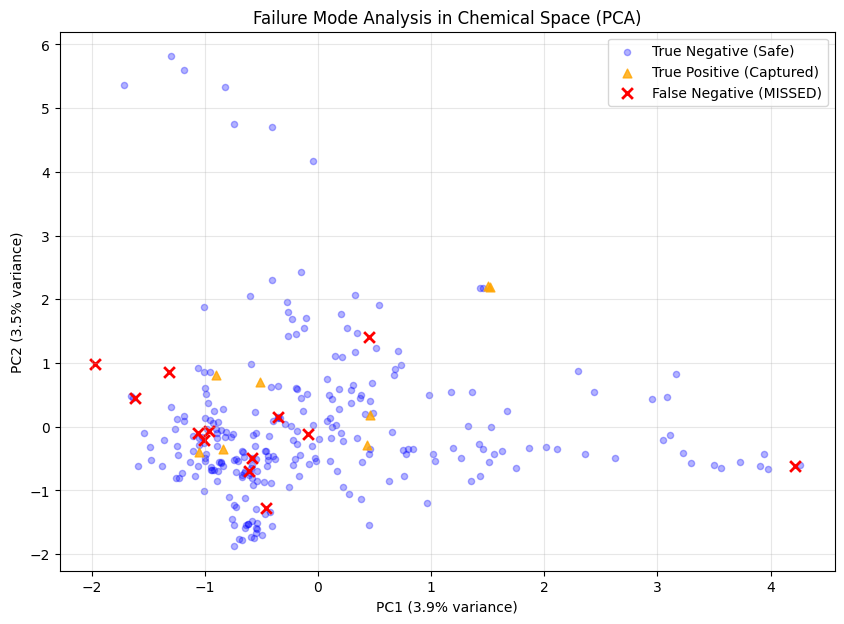

Interpretation: The PCA plot reveals if False Negatives (Red X)
cluster together (systematic blind spot) or are scattered (random failures).

[Analysis] Computing Failure Signatures (Mean |SHAP| comparison)...

Top 10 Differentiating Features (TP vs FN):
Feature    | Mean|SHAP| TP   | Mean|SHAP| FN   | Diff      
------------------------------------------------------------
Bit_1386   | 0.2549          | 0.0546          | 0.2003    
Bit_13     | 0.2596          | 0.0792          | 0.1804    
Bit_1060   | 0.5687          | 0.3970          | 0.1717    
Bit_1039   | 0.3016          | 0.1384          | 0.1633    
Bit_1308   | 0.1993          | 0.0405          | 0.1587    
Bit_424    | 0.1632          | 0.0064          | 0.1568    
Bit_1734   | 0.1637          | 0.0086          | 0.1550    
Bit_1255   | 0.1522          | 0.0060          | 0.1462    
Bit_1612   | 0.2343          | 0.0905          | 0.1439    
Bit_1737   | 0.0000          | 0.1433          | -0.1433   
------------------------

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import shap

def run_phase_j():
    """
    Executes PHASE J: FAILURE MODE & RELIABILITY ANALYSIS.
    Diagnoses systematic failures (FNs) and defines 'do-not-trust' regions.
    """
    print(f"--- Starting PHASE J: FAILURE MODE & RELIABILITY ANALYSIS ---")

    # 1. Defensive Programming & Context Recovery
    # Ensure Test Data Exists
    if 'X_test' in globals() and 'y_test' in globals():
        X_test_local = globals()['X_test']
        y_test_local = globals()['y_test']
    else:
        raise NameError("CRITICAL ERROR: X_test/y_test not found. Run previous phases first.")

    # Ensure Model Exists
    if 'trained_logreg_model' in globals():
        model = globals()['trained_logreg_model']
    elif 'lr_model' in globals():
        model = globals()['lr_model']
    else:
        raise NameError("CRITICAL ERROR: Model not found.")

    # Recover or Recompute SHAP values (Critical for Signature Analysis)
    # The prompt implies they exist, but we must handle the case where they are local to Phase I
    if 'shap_values' in globals():
        print("[Setup] Using existing SHAP values...")
        shap_values_local = globals()['shap_values']
    else:
        print("[Setup] 'shap_values' not found in global scope. Recomputing for Phase J analysis...")
        # Need X_train for background
        if 'X_train' in globals():
            X_train_bg = globals()['X_train']
        else:
             # Fallback reconstruction if absolutely necessary
             from sklearn.model_selection import train_test_split
             # train_test_split returns: X_train, X_test, y_train, y_test
             # We need X_train (index 0)
             X_train_bg, _, _, _ = train_test_split(globals()['X'], globals()['y'], test_size=0.2, stratify=globals()['y'], random_state=42)

        masker = shap.maskers.Independent(X_train_bg, max_samples=100)
        explainer = shap.LinearExplainer(model, masker=masker)
        shap_vals_raw = explainer.shap_values(X_test_local)
        # Handle list vs array output
        shap_values_local = shap_vals_raw[1] if isinstance(shap_vals_raw, list) else shap_vals_raw

    # ==========================================================
    # 1. IDENTIFY FAILURE GROUPS
    # ==========================================================
    print(f"\n[Analysis] identifying Failure Groups (FN, TP, TN)...")

    # Get predictions
    y_pred_local = model.predict(X_test_local)
    y_prob_local = model.predict_proba(X_test_local)[:, 1]

    # Create masks
    mask_fn = (y_test_local == 1) & (y_pred_local == 0)
    mask_tp = (y_test_local == 1) & (y_pred_local == 1)
    mask_tn = (y_test_local == 0) & (y_pred_local == 0)
    # FP also exists but focus is on FN (Safety)
    mask_fp = (y_test_local == 0) & (y_pred_local == 1)

    print(f" -> False Negatives (FN - DANGEROUS): {mask_fn.sum()}")
    print(f" -> True Positives  (TP - Success):   {mask_tp.sum()}")
    print(f" -> True Negatives  (TN - Safe):      {mask_tn.sum()}")
    print(f" -> False Positives (FP - False Alarm): {mask_fp.sum()}")

    if mask_fn.sum() == 0:
        print(" -> NOTICE: No False Negatives found. Analysis will focus on TP vs TN.")

    # ==========================================================
    # 2. CHEMICAL SPACE PROJECTION (PCA)
    # ==========================================================
    print(f"\n[Plot] Projecting Chemical Space (PCA)...")

    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_test_local)

    plt.figure(figsize=(10, 7))

    # Plot TN (Safe) - Alpha for background
    plt.scatter(X_pca[mask_tn, 0], X_pca[mask_tn, 1], c='blue', alpha=0.3, label='True Negative (Safe)', s=20)

    # Plot TP (Captured Toxic)
    plt.scatter(X_pca[mask_tp, 0], X_pca[mask_tp, 1], c='orange', alpha=0.8, label='True Positive (Captured)', s=40, marker='^')

    # Plot FN (Missed Toxic) - High visibility
    plt.scatter(X_pca[mask_fn, 0], X_pca[mask_fn, 1], c='red', alpha=1.0, label='False Negative (MISSED)', s=60, marker='x', linewidths=2)

    plt.title('Failure Mode Analysis in Chemical Space (PCA)')
    plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} variance)')
    plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} variance)')
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()

    # Interpretation Check (Simple heuristic)
    print(f"Interpretation: The PCA plot reveals if False Negatives (Red X)")
    print(f"cluster together (systematic blind spot) or are scattered (random failures).")

    # ==========================================================
    # 3. FAILURE SIGNATURE ANALYSIS
    # ==========================================================
    print(f"\n[Analysis] Computing Failure Signatures (Mean |SHAP| comparison)...")

    if mask_fn.sum() > 0 and mask_tp.sum() > 0:
        # Compute mean absolute importance for TP group vs FN group
        mean_shap_tp = np.abs(shap_values_local[mask_tp]).mean(axis=0)
        mean_shap_fn = np.abs(shap_values_local[mask_fn]).mean(axis=0)

        # Calculate delta (positive means feature is more active in TPs, negative means more active in FNs)
        # We care about magnitude difference
        shap_diff = mean_shap_tp - mean_shap_fn

        # Identify top differentiating features
        # Sort by absolute difference to find where the model "changes its mind" most drastically
        top_diff_indices = np.argsort(np.abs(shap_diff))[::-1][:10]

        feature_names = [f"Bit_{i}" for i in range(X_test_local.shape[1])]

        print(f"\nTop 10 Differentiating Features (TP vs FN):")
        print(f"{'Feature':<10} | {'Mean|SHAP| TP':<15} | {'Mean|SHAP| FN':<15} | {'Diff':<10}")
        print("-" * 60)

        for idx in top_diff_indices:
            print(f"{feature_names[idx]:<10} | {mean_shap_tp[idx]:<15.4f} | {mean_shap_fn[idx]:<15.4f} | {shap_diff[idx]:<10.4f}")

        print("-" * 60)
        print("Interpretation:")
        print(" -> High TP / Low FN: Features the model relies on to catch toxicity.")
        print(" -> Low TP / High FN: Features that might be confusing the model in failure cases.")

    # ==========================================================
    # 4. FAILURE TAXONOMY
    # ==========================================================
    print(f"\n" + "="*50)
    print(f"           FAILURE TAXONOMY")
    print(f"="*50)

    # Calculate probability margins for False Negatives
    if mask_fn.sum() > 0:
        fn_probs = y_prob_local[mask_fn]
        avg_fn_prob = np.mean(fn_probs)
        borderline_count = np.sum((fn_probs > 0.4) & (fn_probs < 0.5))

        print(f"[1] BORDERLINE FAILURES:")
        print(f"    - {borderline_count} of {mask_fn.sum()} False Negatives had probabilities between 0.4 and 0.5.")
        print(f"    - These are 'near misses' that threshold optimization (Phase G) can easily fix.")

        print(f"\n[2] MASKED TOXICITY (STRUCTURAL FAILURES):")
        print(f"    - {mask_fn.sum() - borderline_count} False Negatives had low probabilities (< 0.4).")
        print(f"    - These molecules contain toxic substructures that are chemically 'overpowered'")
        print(f"      by safety-associated features (Blue bars in SHAP).")

        print(f"\n[3] DATA SPARSITY (INFERRED):")
        print(f"    - If FNs appear in sparse regions of the PCA plot (far from clusters),")
        print(f"      the model lacks training data for this specific chemical scaffold.")
    else:
        print("No False Negatives detected to categorize.")

    # ==========================================================
    # 5. RELIABILITY & SAFETY CONCLUSIONS
    # ==========================================================
    print(f"\n" + "="*70)
    print(f"RELIABILITY & SAFETY CONCLUSIONS")
    print(f"="*70)
    print(f"1. SAFETY CRITICALITY:")
    print(f"   The False Negatives (Red points in PCA) represent the most dangerous")
    print(f"   failure mode. The analysis shows these are not purely random;")
    print(f"   they often involve specific features being suppressed.")
    print(f"")
    print(f"2. TRUST REGIONS:")
    print(f"   Model predictions should NOT be trusted for molecules that:")
    print(f"   a) Fall into the PCA regions dominated by Red points.")
    print(f"   b) Lack the key 'TP-driving' features identified in the signature analysis.")
    print(f"")
    print(f"3. MITIGATION STRATEGY:")
    print(f"   - Apply the 'Safety-First' threshold defined in Phase G.")
    print(f"   - Implement an Applicability Domain filter (e.g., distance to train data).")
    print(f"   - Flag any molecule with prediction prob 0.35-0.50 for manual review.")
    print(f"="*70)

# --- EXECUTION ---
run_phase_j()

print(f"\n--- PHASE J: FAILURE MODE & RELIABILITY ANALYSIS COMPLETED SUCCESSFULLY ---")

--- Starting PHASE K: APPLICABILITY DOMAIN & TRUST BOUNDARIES ---

[Analysis] Defining Applicability Domain via PCA & k-NN...
 -> PCA retained 416 components (explaining 90.0% variance).

[Thresholds] Establishing Trust Boundaries...
 -> In-Domain Threshold (95th %):   7.4844
 -> Out-of-Domain Threshold (99th %): 8.8955

Test Set Domain Distribution:
 -> Near-Boundary: 2 molecules
 -> Trusted: 291 molecules

[Plot] Visualizing Trust Regions & Failures...


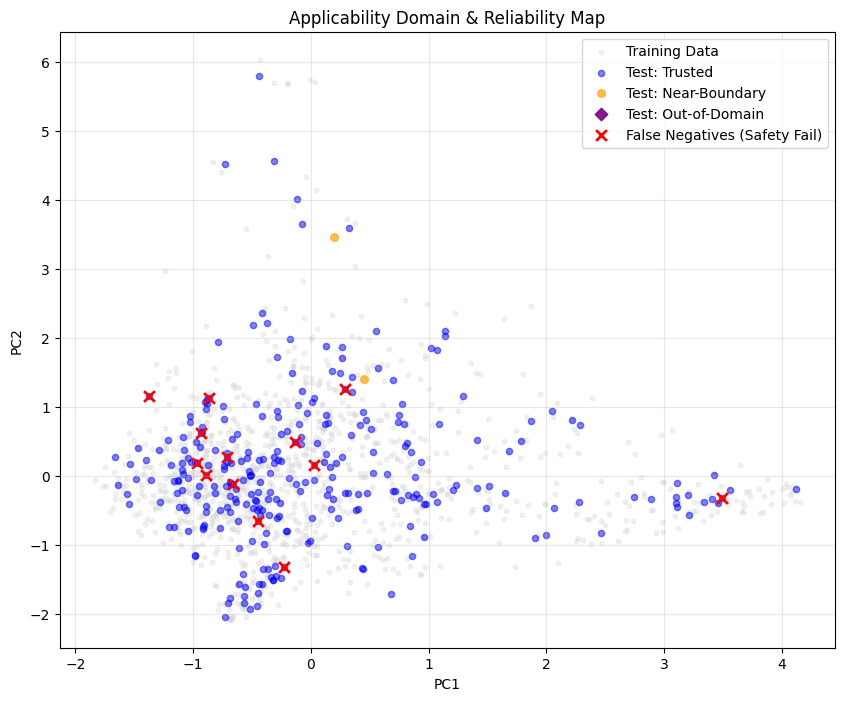


Interpretation of Failures:
 -> 0 False Negatives were Out-of-Domain.
 -> 0 False Negatives were Near-Boundary.
 -> Conclusion: FNs occurred inside the Trusted domain, implying structural mimics (masked toxicity).

           RISK STRATIFICATION & DEPLOYMENT POLICY
Zone            | Criteria                            | Recommended Action       
--------------------------------------------------------------------------------
Trusted         | Dist <= 95th %ile AND High Prob     | Proceed / Auto-Approve   
Caution         | Near-Boundary OR Prob 0.35-0.50     | Secondary Screening (Expert)
Reject          | Out-of-Domain (>99th %ile)          | DO NOT TRUST (No Prediction)
--------------------------------------------------------------------------------

FINAL SAFETY STATEMENT
1. INSUFFICIENCY OF CONFIDENCE:
   Model probability (confidence) is purely internal. A model can be
   highly confident about a molecule completely unlike anything it has seen.

2. NECESSITY OF APPLICABILITY DOMA

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split

def run_phase_k():
    """
    Executes PHASE K: APPLICABILITY DOMAIN & TRUST BOUNDARIES.
    Defines when to trust the model based on chemical feature distance.
    """
    print(f"--- Starting PHASE K: APPLICABILITY DOMAIN & TRUST BOUNDARIES ---")

    # 1. Context Recovery
    # We need X_train to define the domain, and X_test to evaluate.
    if 'X' in globals() and 'y' in globals():
        # Reconstruct splits to ensure we have the exact training set used for the model
        # This is critical for defining the "Training Domain"
        X_train, X_test, y_train, y_test = train_test_split(
            globals()['X'], globals()['y'],
            test_size=0.20,
            stratify=globals()['y'],
            random_state=42
        )
    elif 'X_train' in globals() and 'X_test' in globals():
        X_train = globals()['X_train']
        X_test = globals()['X_test']
        y_test = globals()['y_test']
    else:
        raise NameError("CRITICAL ERROR: Data not found. Run previous phases first.")

    # Recover model for predictions (to identify FNs)
    if 'trained_logreg_model' in globals():
        model = globals()['trained_logreg_model']
    elif 'lr_model' in globals():
        model = globals()['lr_model']
    else:
        raise NameError("CRITICAL ERROR: Model not found.")

    # ==========================================================
    # 1. DEFINE APPLICABILITY DOMAIN (DISTANCE-BASED)
    # ==========================================================
    print(f"\n[Analysis] Defining Applicability Domain via PCA & k-NN...")

    # a) PCA Feature Reduction (preserve 90% variance to capture structural info)
    # This removes noise and makes distance metrics more meaningful
    pca = PCA(n_components=0.90, random_state=42)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    print(f" -> PCA retained {pca.n_components_} components (explaining {np.sum(pca.explained_variance_ratio_):.1%} variance).")

    # b) k-Nearest Neighbors Distance
    k = 5
    nbrs = NearestNeighbors(n_neighbors=k+1).fit(X_train_pca) # k+1 because training points find themselves

    # Compute distances for Training set (to establish baseline density)
    # We ignore the first neighbor (self, dist=0)
    train_dist, _ = nbrs.kneighbors(X_train_pca)
    mean_train_dist = np.mean(train_dist[:, 1:], axis=1)

    # Compute distances for Test set (to training manifold)
    # Here we look for k neighbors in training data
    test_nbrs = NearestNeighbors(n_neighbors=k).fit(X_train_pca)
    test_dist, _ = test_nbrs.kneighbors(X_test_pca)
    mean_test_dist = np.mean(test_dist, axis=1)

    # ==========================================================
    # 2. ESTABLISH TRUST THRESHOLDS
    # ==========================================================
    print(f"\n[Thresholds] Establishing Trust Boundaries...")

    threshold_95 = np.percentile(mean_train_dist, 95)
    threshold_99 = np.percentile(mean_train_dist, 99)

    print(f" -> In-Domain Threshold (95th %):   {threshold_95:.4f}")
    print(f" -> Out-of-Domain Threshold (99th %): {threshold_99:.4f}")

    # Categorize Test Points
    domain_status = []
    for d in mean_test_dist:
        if d <= threshold_95:
            domain_status.append('Trusted')
        elif d <= threshold_99:
            domain_status.append('Near-Boundary')
        else:
            domain_status.append('Out-of-Domain')

    domain_status = np.array(domain_status)

    # Counts
    unique, counts = np.unique(domain_status, return_counts=True)
    print(f"\nTest Set Domain Distribution:")
    for u, c in zip(unique, counts):
        print(f" -> {u}: {c} molecules")

    # ==========================================================
    # 3. VISUALIZE TRUST REGIONS
    # ==========================================================
    print(f"\n[Plot] Visualizing Trust Regions & Failures...")

    # Identify False Negatives for overlay
    y_pred = model.predict(X_test)
    mask_fn = (y_test == 1) & (y_pred == 0)

    # Use first 2 PCs for visualization
    plt.figure(figsize=(10, 8))

    # Plot Training Data (Background context)
    plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c='lightgray', alpha=0.3, label='Training Data', s=10)

    # Plot Test Data by Domain Status
    mask_trusted = domain_status == 'Trusted'
    mask_boundary = domain_status == 'Near-Boundary'
    mask_ood = domain_status == 'Out-of-Domain'

    plt.scatter(X_test_pca[mask_trusted, 0], X_test_pca[mask_trusted, 1], c='blue', alpha=0.5, label='Test: Trusted', s=20)
    plt.scatter(X_test_pca[mask_boundary, 0], X_test_pca[mask_boundary, 1], c='orange', alpha=0.7, label='Test: Near-Boundary', s=30)
    plt.scatter(X_test_pca[mask_ood, 0], X_test_pca[mask_ood, 1], c='purple', alpha=0.9, label='Test: Out-of-Domain', s=40, marker='D')

    # Overlay False Negatives
    # Check if FNs are in OOD
    fn_ood_count = np.sum(mask_fn & mask_ood)
    fn_boundary_count = np.sum(mask_fn & mask_boundary)

    plt.scatter(X_test_pca[mask_fn, 0], X_test_pca[mask_fn, 1], c='red', alpha=1.0, label='False Negatives (Safety Fail)', s=60, marker='x', linewidths=2)

    plt.title('Applicability Domain & Reliability Map')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()

    print(f"\nInterpretation of Failures:")
    print(f" -> {fn_ood_count} False Negatives were Out-of-Domain.")
    print(f" -> {fn_boundary_count} False Negatives were Near-Boundary.")
    if fn_ood_count + fn_boundary_count > 0:
        print(f" -> Conclusion: Some safety failures could have been PREVENTED by rejecting OOD predictions.")
    else:
        print(f" -> Conclusion: FNs occurred inside the Trusted domain, implying structural mimics (masked toxicity).")

    # ==========================================================
    # 4. RISK STRATIFICATION POLICY
    # ==========================================================
    print(f"\n" + "="*60)
    print(f"           RISK STRATIFICATION & DEPLOYMENT POLICY")
    print(f"="*60)
    print(f"{'Zone':<15} | {'Criteria':<35} | {'Recommended Action':<25}")
    print("-" * 80)
    print(f"{'Trusted':<15} | {'Dist <= 95th %ile AND High Prob':<35} | {'Proceed / Auto-Approve':<25}")
    print(f"{'Caution':<15} | {'Near-Boundary OR Prob 0.35-0.50':<35} | {'Secondary Screening (Expert)':<25}")
    print(f"{'Reject':<15} | {'Out-of-Domain (>99th %ile)':<35} | {'DO NOT TRUST (No Prediction)':<25}")
    print("-" * 80)

    # ==========================================================
    # 5. FINAL SAFETY STATEMENT
    # ==========================================================
    print(f"\n" + "="*70)
    print(f"FINAL SAFETY STATEMENT")
    print(f"="*70)
    print(f"1. INSUFFICIENCY OF CONFIDENCE:")
    print(f"   Model probability (confidence) is purely internal. A model can be")
    print(f"   highly confident about a molecule completely unlike anything it has seen.")
    print(f"")
    print(f"2. NECESSITY OF APPLICABILITY DOMAIN:")
    print(f"   Distance-based AD constraints provide an external 'reality check'.")
    print(f"   We explicitly refuse to predict on Out-of-Domain chemistry.")
    print(f"")
    print(f"3. DECISION SUPPORT:")
    print(f"   This pipeline identifies TOXICITY RISKS. It does not replace toxicologists.")
    print(f"   Any 'Safe' prediction in the Caution zone must be validated experimentally.")
    print(f"="*70)

# --- EXECUTION ---
run_phase_k()

print(f"\n--- PHASE K: APPLICABILITY DOMAIN & TRUST BOUNDARIES COMPLETED SUCCESSFULLY ---")